In [1]:
import os
import sys
os.chdir('/home/mk7976/git/gaiablip') # Go to the parents directory
cwd = os.getcwd() # Retrieve directory of current running processes
sys.path.insert(0, cwd) # Change the system path to the current running directory

import dynamics_fcns as df
import bh_prior_fcns

priors = bh_prior_fcns.BH_priors()

import numpy as np
import scipy

dynamics = df.Dynamics()

In [2]:
# Change system path 
os.chdir('/home/mk7976/git/gaiablip/analysis/') # Go to the parents directory
cwd = os.getcwd() # Retrieve directory of current running processes
sys.path.insert(0, cwd) # Change the system path to the current running directory

import os
import sys
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
import analysis_fcns as af 
import pandas as pd
import dynamics_fcns as df

In [3]:
obs_info = pd.read_csv('./obs_info.csv', sep=",", header=None, skiprows = [0]) # Read observation info csv
obs_info.columns = ['t_obs','scan_angles'] # Specify what each column in obs_info file are
# Extrapolate info from obs_info file
t_obs = obs_info['t_obs'].to_numpy() # Observation times [Julian years]
scan_angles = obs_info['scan_angles'].to_numpy() #  Scan angles [rad]
t_ref = 2017.5 # Reference time for calculating displacement [Julian years]
n_obs = len(t_obs) # Number of observations

In [4]:
plt.rcdefaults()
fontsize = 14
from matplotlib import font_manager
from matplotlib import rcParams
from matplotlib import rc

cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
plt.rcParams['font.serif']=cmfont.get_name()
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "font.size" : fontsize,
          "text.usetex" : False,
          "mathtext.fontset" : "cm",
          "font.family" : "serif",
          "font.serif" : [cmfont.get_name()]}
plt.rcParams['axes.unicode_minus']=False
plt.rcParams.update(params)

In [5]:
mas2deg = 1./3600000.1486299
catalog_path = '/scratch/mk7976/epoch_astrometry/infinite_binary'

In [6]:
accel_ts_list = []
event_ts_list = []
interesting_id_list = []
blip_search = af.blip_search('bh')
results_list = os.listdir('/scratch/mk7976/fit_results/binary/infinite_period_results/accel_multinest_results')
ts_list = []

In [12]:
t_array = np.array([0,3000])

69.2313315578154 410.5519265262885


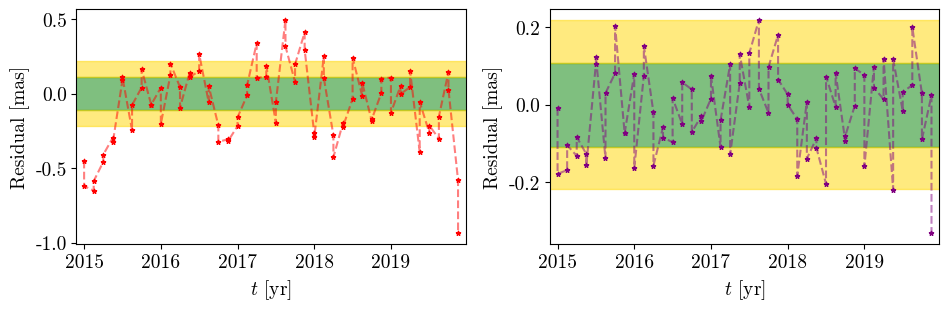

In [13]:
n=0

os.chdir('/home/mk7976/git/gaiablip/') # Go to the parents directory
cwd = os.getcwd() # Retrieve directory of current running processes
sys.path.insert(0, cwd) # Change the system path to the current running director

for n,catalog in enumerate(results_list):
           
    results_name = results_list[n]
    
    results_number = results_name[6:-4]
        
    free_results = pd.read_csv('/scratch/mk7976/fit_results/binary/infinite_period_results/free_multinest_results/free_'+str(results_number)+'.csv')
    accel_results = pd.read_csv('/scratch/mk7976/fit_results/binary/infinite_period_results/accel_multinest_results/accel_'+str(results_number)+'.csv')
    catalog_path = '/scratch/mk7976/epoch_astrometry/infinite_binary' # Specify the folder to load the catalog from
    
    results_row = accel_results.iloc[0]
    source_id = accel_results.iat[0,0]
    
    np.random.seed(int(n)) # Set a random seed to ensure data gets scrambled in the same way every time    

    x0 = float(results_row[1])
    x1 = float(results_row[2])
    x2 = float(results_row[3])
    x3 = float(results_row[4])
    x4 = float(results_row[5])
    x5 = float(results_row[6])
    x6 = float(results_row[7])

    x = np.array([x0,x1,x2,x3,x4,x5,x6])
    
    data = catalog_path+'/binary_info_'+str(results_number)+'.npz' # Specify the location of the obs files
    data = np.load(data) # Load observation data from pickle file
    
    results_row = accel_results.iloc[0] # Skip header
    chisq = float(results_row[6]) # chi_square
    free_results_row = free_results.iloc[0]
    
    y0 = float(free_results_row[1])
    y1 = float(free_results_row[2])
    y2 = float(free_results_row[3])
    y3 = float(free_results_row[4])
    y4 = float(free_results_row[5])

    y=np.array([y0,y1,y2,y3,y4])

    free_ts = free_results_row[6]

    accel_results_row = accel_results.iloc[0]
    accel_ts = accel_results_row[8]

    source_id = int(results_number)
    source_ra0 = float(data['ra0']) # RA of source at first observation epoch [deg]
    source_dec0 = float(data['dec0']) # DEC of source at first observation epoch [deg]
    source_ddefl_noerr = np.array(data['traj_AL']) # Change in displacement [mas]
    source_dist = float(data['d']) # Estimated distance to source [pc]
    source_gmag = 15.9 # Set G magntiude to the median of the catalog if it is not available

    source_ddefl_err = blip_search.disp_err(source_gmag) # 
    source_ddefl = np.random.normal(loc = source_ddefl_noerr,scale = source_ddefl_err) # Scramble data according to a normal distribution with 1 sigma = source_ddec_err [mas]

    # Compute the AL location of the source according to the lensed model
    al_traj = dynamics.unlens7p_AL(source_ra0,source_dec0,x[2],x[3],x[4],
        x[5],x[6]) # [mas]

    # Compute the AL offset
    al_offset = np.sin(scan_angles)*x[0]+np.cos(scan_angles)*x[1] # [mas]

    lensed_ddefl = al_traj+al_offset

    # Compute the difference in AL coordinates between the data and the unlensed model
    data_res = lensed_ddefl-source_ddefl # [mas]

    al_nolens_offset = np.sin(scan_angles)*x[0]+np.cos(scan_angles)*x[1] # [mas]
    al_no_lens_offset = np.sin(scan_angles)*y[0]+np.cos(scan_angles)*y[1] # [mas]

    nolens_ddefl = dynamics.unlens_AL(source_ra0,source_dec0,x[2],x[3],x[4]) + al_nolens_offset 
    no_lens_ddefl = dynamics.unlens_AL(source_ra0,source_dec0,y[2],y[3],y[4]) + al_no_lens_offset 

    no_lens_data_res = no_lens_ddefl-source_ddefl
    
    parallax = (1/x[4])*1000
    mura = x[2]
    mudec = x[3]
    alphadeg = source_ra0
    deltadeg = source_dec0

    ts = results_row[8]
    ts_list.append(ts)
    reconstructed_ts = blip_search.free_7p_ll(source_ddefl,source_ddefl_err,source_ra0,source_dec0,x)        
    
    s_dist = float(data['d']) # Estimated distance to source [pc]
    
    if int(source_id)==360:
        
        fig, axd = plt.subplot_mosaic([['left', 'right']],
            figsize=(9.375, 3), constrained_layout=True)
        
        #axd['left'].errorbar(t_obs,source_ddefl,np.ones(80)*source_ddefl_err,color='black',label='Catalog Path',alpha=1.0,linestyle='',capsize=3, elinewidth=1.5,zorder=0)
        axd['left'].set_xlabel('$t$ [yr]')
        axd['left'].set_ylabel('Residual [mas]')
        axd['left'].fill_between(t_array,-1*source_ddefl_err[0],1*source_ddefl_err[0],color='green',alpha=0.5)
        axd['left'].fill_between(t_array,1*source_ddefl_err[0],2*source_ddefl_err[0],color='gold',alpha=0.5)
        axd['left'].fill_between(t_array,-2*source_ddefl_err[0],-1*source_ddefl_err[0],color='gold',alpha=0.5)
        axd['left'].scatter(t_obs,no_lens_data_res,color='red',marker='*',zorder=21,s=10)
        axd['left'].plot(t_obs,no_lens_data_res,color='red',linestyle='--',alpha=0.5,zorder=20)
        axd['left'].set_xlim(t_obs[0]-0.1,t_obs[-1]+0.1)
        
        axd['right'].set_xlabel('$t$ [yr]')
        axd['right'].set_ylabel('Residual [mas]')
        axd['right'].fill_between(t_array,-1*source_ddefl_err[0],1*source_ddefl_err[0],color='green',alpha=0.5)
        axd['right'].fill_between(t_array,1*source_ddefl_err[0],2*source_ddefl_err[0],color='gold',alpha=0.5)
        axd['right'].fill_between(t_array,-2*source_ddefl_err[0],-1*source_ddefl_err[0],color='gold',alpha=0.5)
        axd['right'].scatter(t_obs,data_res,color='purple',marker='*',zorder=21,s=10)
        axd['right'].plot(t_obs,data_res,color='purple',linestyle='--',alpha=0.5,zorder=20)
        axd['right'].set_xlim(t_obs[0]-0.1,t_obs[-1]+0.1)
        
        print(accel_ts,free_ts)
        
        fig.savefig('/home/mk7976/git/gaiablip/analysis/plotting/binary_accel_plot.pdf',dpi=500)
        
        plt.show()